# Gradient descents

![](../../assets/images/gd_0.jpg)


## Understanding the algorithm

Gradient descent is an optimization algorithm used to minimize a function iteratively. Given a function $ f(x) $, the algorithm starts with an initial guess $ x_0 $ for the minimum and iteratively refines this guess. In each iteration, the gradient $ \nabla f(x) $ of the function at the current guess is computed. The gradient is a vector that points in the direction of the steepest ascent of the function. To minimize the function, one moves in the direction opposite to the gradient, updating the current guess according to the formula:

$$
x_{\text{new}} = x_{\text{old}} - \alpha \nabla f(x_{\text{old}})
$$

Here, $ \alpha $ is the learning rate, a hyperparameter that controls the step size. This process is repeated until the function value $ f(x) $ satisfies [stopping conditions](#stopping-conditions). 


## Usage examples

1. **Machine Learning Models**: It's used in machine learning algorithms like linear regression, logistic regression, neural networks, and support vector machines. In these models, gradient descent helps to optimize parameters iteratively, refining them based on the cost function to improve the model's performance.

2. **TensorFlow Applications**: TensorFlow, a leading tool for training deep learning models, utilizes gradient descent in many creative ways. One interesting use case is in the field of deep learning, where gradient descent is employed for training models such as variational auto-encoders (VAEs). VAEs can produce realistic images (like faces) from a set of numbers, and gradient descent helps in optimizing these models for diverse outputs.

3. **Optimization in High-Dimensional Spaces**: Gradient descent is particularly useful in problems involving high-dimensional spaces, where it aids in finding unit vectors that are maximally spread apart. This application is crucial in complex deep learning models where the dimensionality of the data is high.

4. **Cost Function Optimization**: In general machine learning, gradient descent is instrumental in minimizing the cost function. By iteratively adjusting the model parameters in the opposite direction of the gradient, it seeks to find the optimal set of parameters that reduce the discrepancy between the predicted output of the model and the actual output.

## Strengths

1. **Simplicity and Ease of Implementation**: One of the key strengths of gradient descent is its simplicity. This makes it easy to understand and implement, even for those who are new to optimization algorithms. Its implementation involves iteratively moving towards the minimum of a function, making it a straightforward approach for optimization problems.

2. **Flexibility**: Gradient descent is highly flexible and can be applied to a wide range of problems. It is particularly effective in scenarios where the objective function is complex and does not have a closed-form solution, such as in many machine learning algorithms.

3. **Efficiency with Large Datasets**: When dealing with large datasets, gradient descent proves to be efficient, especially in its stochastic and mini-batch variants. These versions of the algorithm can provide faster convergence and can handle large-scale data more effectively compared to some other optimization methods.

4. **Adaptability to Online Learning**: Gradient descent, particularly its stochastic version, is well-suited for online learning scenarios. In online learning, the model needs to be updated continuously as new data arrives, and stochastic gradient descent can efficiently handle these updates.

5. **Scope for Improvements and Variations**: The basic gradient descent algorithm has been extended and improved in various ways to enhance its performance. Advanced variants like Momentum, Adagrad, and Adam have been developed to address specific challenges such as oscillations in the path to convergence, adapting the learning rate, and accelerating convergence.

6. **Good Performance in Practice**: In practical applications, especially in training deep neural networks, gradient descent and its variants generally perform well. They have been successfully used in a wide range of applications, demonstrating their effectiveness in real-world scenarios.

## Weaknesses

1. **Difficulty in Choosing Learning Rate**: Selecting an appropriate learning rate is challenging. A rate that's too low can result in slow convergence, while a too high rate might prevent convergence altogether or cause fluctuations around the minimum.

2. **Same Learning Rate for All Updates**: In scenarios with sparse data, where features have varying frequencies, applying the same learning rate to all parameters may not be optimal.

3. **Trapped in Suboptimal Local Minima or Saddle Points**: Particularly in highly non-convex error functions common in neural networks, gradient descent can get trapped in local minima or saddle points, hindering finding the global minimum.

4. **Sensitivity to Feature Scaling**: Gradient descent can be highly sensitive to the scaling of features. If features are on different scales, the algorithm can take longer to converge, as it may oscillate inefficiently down the gradients in the steeper directions.

5. **Dependence on Initial Values**: The starting point can significantly impact gradient descent's performance. A poor initial value can lead to a longer path to convergence or getting stuck in suboptimal points, especially in complex landscapes with many local minima.

## Stopping conditions

1. **Maximum Number of Iterations (maxit)**: This condition sets a predetermined limit on the number of iterations the algorithm will execute. It serves as a simple and straightforward way to prevent the algorithm from running indefinitely, especially in cases where convergence is slow or not guaranteed.

2. **Absolute Tolerance (abstol)**: This stopping criterion is employed when the function value approaches a certain "close enough" threshold to zero. It ensures that the algorithm halts when it reaches an acceptable level of accuracy or closeness to the desired objective value.

3. **Relative Tolerance (reltol)**: Similar to abstol, but instead of focusing on the absolute value of the function, it considers the relative improvement in the objective function from one iteration to the next. The algorithm stops when the improvement falls below a specified threshold, indicating that further iterations are unlikely to yield significant enhancements.

## GD variants

1. **Batch Gradient Descent**: This variant computes the gradient of the cost function using the entire dataset. It updates the model parameters after processing all training examples, leading to a smooth reduction in the cost function. However, its computation cost is high, especially for large datasets.

2. **Stochastic Gradient Descent (SGD)**: Unlike batch gradient descent, SGD updates the model parameters after every single observation. This makes the update process faster but less smooth, as the model might start learning noise. It is beneficial for large datasets where the batch approach is computationally expensive.

3. **Mini-Batch Gradient Descent**: This is a compromise between batch and stochastic gradient descent. It updates parameters after processing a subset of the dataset. This method balances the smoothness of batch gradient descent with the speed of SGD. Mini-batch sizes are often tailored to match the computing architecture, like powers of 2 that fit the memory requirements of the GPU or CPU.

4. **Momentum**: This variant is intended to accelerate SGD by navigating relevant directions and dampening oscillations. It works by adding a fraction of the previous update vector to the current update, effectively increasing the speed for dimensions whose gradients point in the same direction and reducing updates for dimensions whose gradients change directions.

5. **Nesterov Accelerated Gradient (NAG)**: NAG is an improvement over traditional momentum. It gives a prescient characteristic to the momentum term by approximating the future position of parameters, thereby improving responsiveness and performance, especially in recurrent neural networks (RNNs).

6. **Adagrad (Adaptive Gradient Algorithm)**: Adagrad adapts the learning rate to each parameter, performing smaller updates for frequently occurring features and larger updates for infrequent ones. It's particularly useful for dealing with sparse data and has been used successfully in large-scale neural networks and for training word embeddings like GloVe.

7. **Adadelta**: This variant addresses the vanishing learning rate problem of Adagrad by using the exponentially decaying average of past squared gradients instead of accumulating all past gradients. This helps in maintaining a more robust learning rate throughout the training process.

8. **Adam (Adaptive Moment Estimation)**: Adam is one of the most popular optimizers in deep learning. It combines the benefits of Adadelta and RMSprop, adjusting the learning rate for each parameter and using the running averages of both the gradients and the second moments of the gradients.

## Python demonstration

### Gradient descents design

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt


# Define the gradient of the objective function
def gradient(function, point):
    h = 1e-5
    grad = np.zeros_like(point)
    for i in range(len(point)):
        point_plus_h = np.copy(point)
        point_plus_h[i] += h
        grad[i] = (function(point_plus_h) - function(point)) / h
    return grad

# Gradient descent function with path recording
def gradient_descent_with_path(function, initial_point, learning_rate, tolerance):
    point = initial_point
    path = [point]  # Store the path of points
    nb_iter = 0
    old_loss = function(point)
    
    while True:
        nb_iter += 1
        gradient_at_point = gradient(function, point)
        
        # Update rule
        point = point - (learning_rate * gradient_at_point)
        path.append(point)  # Add new point to path
        
        # Compute new loss
        new_loss = function(point)

        # Check for convergence
        if abs(new_loss - old_loss) < tolerance:
            break
            
        old_loss = new_loss

    return np.array(path), nb_iter

# Define gradient descent with momentum
def gradient_descent_momentum(function, initial_point, learning_rate, tolerance, momentum=0.9):
    point = initial_point
    path = [point]  # Store the path of points
    velocity = np.zeros_like(point)
    nb_iter = 0
    old_loss = function(point)

    while True:
        nb_iter += 1
        gradient_at_point = gradient(function, point)
        
        # Update rule with momentum
        velocity = momentum * velocity + learning_rate * gradient_at_point
        point = point - velocity
        path.append(point)

        # Compute new loss
        new_loss = function(point)

        # Check for convergence
        if abs(new_loss - old_loss) < tolerance:
            break
        old_loss = new_loss

    return np.array(path), nb_iter

# Define stochastic gradient descent
def stochastic_gradient_descent(function, initial_point, learning_rate, tolerance):
    point = initial_point
    path = [point]  # Store the path of points
    nb_iter = 0
    old_loss = function(point)

    while True:
        nb_iter += 1
        # Simulate stochastic gradient by perturbing the current point
        stochastic_point = point + np.random.normal(0, 0.1, size=point.shape)
        gradient_at_point = gradient(function, stochastic_point)
        
        # Update rule
        point = point - (learning_rate * gradient_at_point)
        path.append(point)

        # Compute new loss
        new_loss = function(point)

        # Check for convergence
        if abs(new_loss - old_loss) < tolerance:
            break
        old_loss = new_loss

    return np.array(path), nb_iter

### Execution

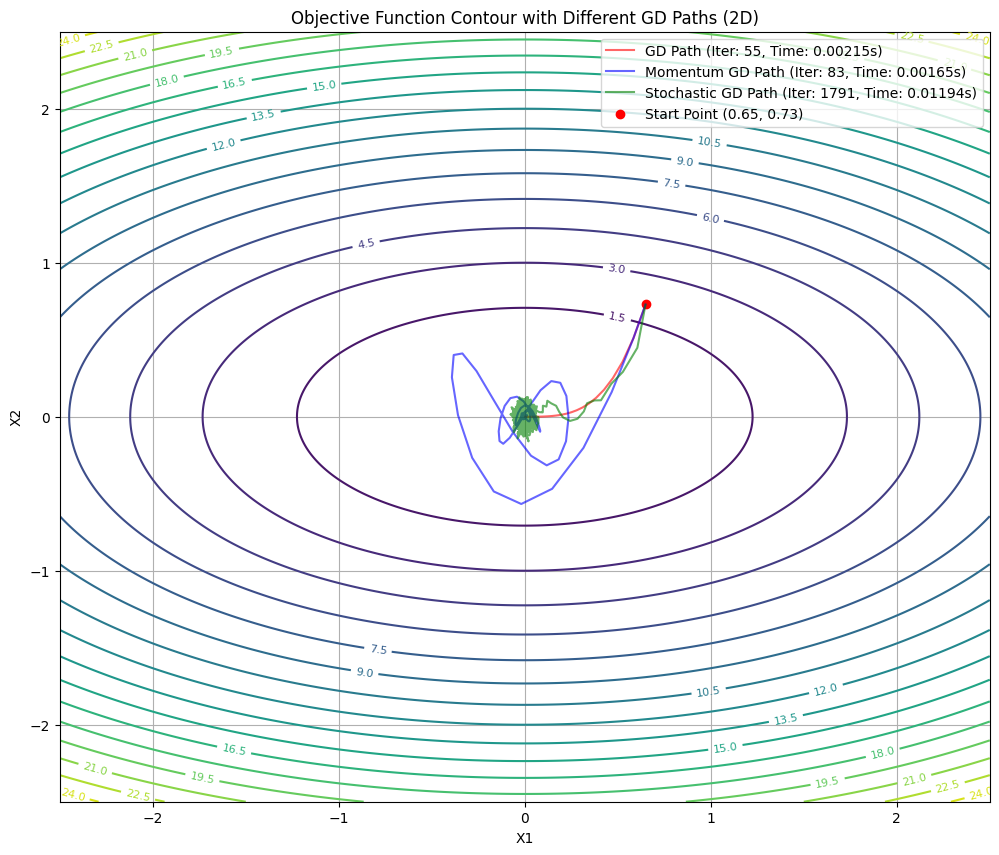

In [2]:
### PROBLEM DEFINITION
rng_engine = np.random.default_rng(seed=None)

objective_function = lambda x: (x[0] ** 2) + (3 * (x[1] ** 2))
# objective_function:
# This is the function that gradient descent is attempting to minimize. In this example, it's a simple quadratic function
# with different weights on two variables (x[0] and x[1]). The goal of gradient descent is to find the point (x[0], x[1])
# that minimizes this function.

P0 = np.array([rng_engine.random() * 2.5, rng_engine.random() * 2.5])
# P0 (Initial Point):
# This represents the starting point of the gradient descent algorithm. The choice of the initial point can significantly
# affect the algorithm's performance and final outcome, especially in functions with multiple local minima.
# Randomizing the starting point as shown can help in exploring different areas of the search space.

lr = 0.05
# lr (Learning Rate):
# This hyperparameter controls the size of the steps taken towards the minimum. A larger learning rate makes bigger steps,
# which can speed up convergence but risks overshooting the minimum. A smaller learning rate makes finer adjustments,
# which can be more precise but may lead to slower convergence or getting stuck in local minima.

tol = 1e-6
# tol (Stopping Tolerance):
# This parameter sets the threshold for stopping the algorithm. When the difference in the loss function between
# successive iterations is less than this tolerance, the algorithm stops. It prevents unnecessary computations after
# convergence. A smaller tolerance leads to a more precise convergence but requires more iterations.


# Run the algorithms
start_time = time.time()
path, iter_basic = gradient_descent_with_path(objective_function, P0, lr, tol)
time_basic = time.time() - start_time

start_time = time.time()
path_momentum, iter_momentum = gradient_descent_momentum(objective_function, P0, lr, tol)
time_momentum = time.time() - start_time

start_time = time.time()
path_stochastic, iter_stochastic = stochastic_gradient_descent(objective_function, P0, lr, tol)
time_stochastic = time.time() - start_time

### PLOTTING

# Generating a meshgrid for visualization of the objective function
x = np.linspace(-2.5, 2.5, 1000)
y = np.linspace(-2.5, 2.5, 1000)
X, Y = np.meshgrid(x, y)
Z = objective_function([X, Y])

# Plotting
plt.figure(figsize=(12, 10))
contours = plt.contour(X, Y, Z, 20, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)

# Original gradient descent path
plt.plot(path[:, 0], path[:, 1], marker='', color='red', alpha=0.6, 
         label=f'GD Path (Iter: {iter_basic}, Time: {time_basic:.5f}s)')

# Momentum-based gradient descent path
plt.plot(path_momentum[:, 0], path_momentum[:, 1], marker='', color='blue', alpha=0.6, 
         label=f'Momentum GD Path (Iter: {iter_momentum}, Time: {time_momentum:.5f}s)')

# Stochastic gradient descent path
plt.plot(path_stochastic[:, 0], path_stochastic[:, 1], marker='', color='green', alpha=0.6, 
         label=f'Stochastic GD Path (Iter: {iter_stochastic}, Time: {time_stochastic:.5f}s)')

plt.scatter(round(P0[0], 2), round(P0[1], 2), color='red', label=f'Start Point ({round(P0[0], 2)}, {round(P0[1], 2)})')
plt.title('Objective Function Contour with Different GD Paths (2D)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid(True)
plt.show()

<div class="alert alert-block alert-warning">
🚨 Comparing different variants of the gradient descent algorithm (basic, stochastic, and momentum-based, as illustrated in the example below) with the same hyperparameter configuration may not be the most appropriate approach. Ideally, each variant should be optimized with a configuration that best suits its characteristics.
</div>

End of demonstration

---

## Practical optimization tools

1. [**TensorFlow (Python):**](https://www.tensorflow.org) TensorFlow, an open-source library developed by Google, is renowned for its flexible architecture that enables easy deployment of computation across various platforms. It's particularly strong in training and inference of deep neural networks and includes sophisticated optimization algorithms like gradient descent and its variants. TensorFlow is favored for its scalability, extensive community support, and comprehensive suite of tools for machine learning and deep learning.

2. [**Deeplearning4j (Java):**](https://deeplearning4j.konduit.ai/) Deeplearning4j is a prominent open-source, distributed deep-learning library for Java and Scala. It integrates with Hadoop and Apache Spark and is designed to be used in business environments on distributed GPUs and CPUs. Deeplearning4j includes implementations of various optimization algorithms, including different forms of gradient descent. It's particularly valued for its native support for Java, which is a widely used language in enterprise environments, allowing the seamless integration of deep learning into existing Java-based infrastructure.

3. [**PyTorch (Python):**](https://pytorch.org/) PyTorch, another popular open-source machine learning library, is known for its ease of use, flexibility, and dynamic computational graph. It provides a variety of optimization algorithms including gradient descent variants, which are integral for training neural networks. PyTorch is widely adopted in the research community for its intuitive design and efficient performance in both development and research settings.

4. [**Keras (Python):**](https://keras.io/) Keras is a high-level neural networks API, capable of running on top of TensorFlow, Theano, or Microsoft Cognitive Toolkit. It simplifies the implementation of deep learning models, including the use of various gradient descent algorithms. Keras is praised for its user-friendliness, modularity, and extensibility, making it suitable for both beginners and experienced practitioners in deep learning.

5. [**Apache MXNet (Python, R, Scala, C++, Julia):**](https://mxnet.apache.org/) Apache MXNet is a multi-language machine learning library known for its efficiency in large-scale deep learning models. It supports a range of optimization algorithms, including gradient descent and its variants. MXNet stands out for its scalability across multiple GPUs and distributed computing environments, and its support for a variety of programming languages broadens its appeal to a wide array of developers.

## Sources

| Sources |
|---------|
|[Gradient descent - Wikipedia](https://en.wikipedia.org/wiki/Gradient_descent)|
|[Variants of Gradient Descent Algorithm - Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/03/variants-of-gradient-descent-algorithm/)|
|[Gradient Descent and its Types - Analyticsvidhya](https://www.analyticsvidhya.com/blog/2022/07/gradient-descent-and-its-types/)|
|[An overview of gradient descent optimization algorithms - Ruder](https://www.ruder.io/optimizing-gradient-descent/)|
|[Guide to Gradient Descent and Its Variants with Python Implementation - Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/06/guide-to-gradient-descent-and-its-variants-with-python-implementation/)|
|[An overview of gradient descent optimization algorithms - arxiv](https://ar5iv.labs.arxiv.org/html/1609.04747)|
|[Search results for "Gradient Descent" - Machine Learning Mastery](https://machinelearningmastery.com/?s=Gradient+Descent&post_type=post&submit=Search)|
|[Mini-Batch Gradient Descent and DataLoader in PyTorch - Machine Learning Mastery](https://machinelearningmastery.com/mini-batch-gradient-descent-and-dataloader-in-pytorch/)|
|[A Gentle Introduction To Gradient Descent Procedure - Machine Learning Mastery](https://machinelearningmastery.com/a-gentle-introduction-to-gradient-descent-procedure/)|
|[How to Implement Gradient Descent Optimization from Scratch - Machine Learning Mastery](https://machinelearningmastery.com/gradient-descent-optimization-from-scratch/)|
|[How Does the Gradient Descent Algorithm Work in Machine Learning? - Analyticsvidhya](https://www.analyticsvidhya.com/blog/2020/10/how-does-the-gradient-descent-algorithm-work-in-machine-learning/)|
|[The Many Applications of Gradient Descent in TensorFlow - Toptal](https://www.toptal.com/python/gradient-descent-in-tensorflow )|
|[Introduction image - Cornell University](https://arxiv.org/abs/1805.04829)|